# CIFAR-10 Multiple Classes


CIFAR-10 dataset have 60000 32x32 colour images in 10 classes.

6000 images per class.
There are 50000 training images and 10000 test images.


classes in the dataset
+ 0: airplane 										
+ 1: automobile 										
+ 2: bird 										
+ 3: cat 										
+ 4: deer 										
+ 5: dog 										
+ 6: frog 										
+ 7: horse 										
+ 8: ship 										
+ 9: truck 										

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CIRAR10 dataset

In [4]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


#Visualizing the Image

In [5]:
x_train.shape # 50,000 batch size, 32x32 image with 3 color channels (RBG)

(50000, 32, 32, 3)

In [6]:
x_train[0].shape # 32x32 image with 3 color channels (RBG)

(32, 32, 3)

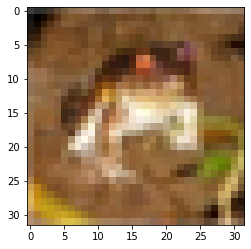

In [9]:
plt.imshow(x_train[0]);

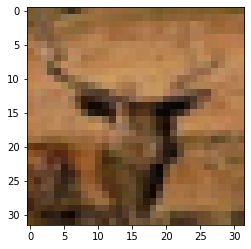

In [10]:
plt.imshow(x_train[1212]);

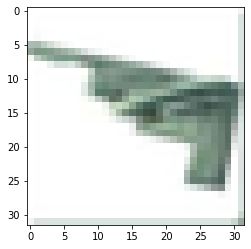

In [11]:
plt.imshow(x_train[12345]);

-------

# preprocessing

#Encoding Labels Values(one hot encoding)

In [12]:

from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [14]:
y_train[0] 

array([6], dtype=uint8)

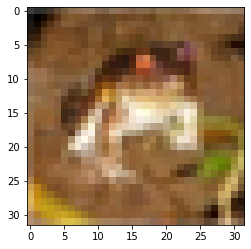

In [15]:
plt.imshow(x_train[0]);

-----

#Normalizing Image Data

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [20]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [22]:
x_train.shape

(50000, 32, 32, 3)

---

-----

# Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
32*32*3 # single color image

3072

In [25]:
model = Sequential()

# 2 Convolutional Layers
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu')) # we can change filters number here, but in our case images are simple so we will keep the same
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# ------------------------

model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



### Check model summary

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

### add in Early Stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

### Fit the model

In [29]:
model.fit(x=x_train, y=y_cat_train, 
              validation_data = (x_test, y_cat_test),
              epochs=15,
              callbacks= [early_stopping],
              verbose=1)

Epoch 1/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4568 - accuracy: 0.4787 - val_loss: 1.1788 - val_accuracy: 0.5804
Epoch 2/15
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0960 - accuracy: 0.6166 - val_loss: 1.0415 - val_accuracy: 0.6352
Epoch 3/15
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9413 - accuracy: 0.6698 - val_loss: 1.0463 - val_accuracy: 0.6364
Epoch 4/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8264 - accuracy: 0.7105 - val_loss: 0.9368 - val_accuracy: 0.6796
Epoch 5/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7283 - accuracy: 0.7452 - val_loss: 0.9413 - val_accuracy: 0.6741
Epoch 6/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6354 - accuracy: 0.7768 - val_loss: 0.9456 - val_accuracy: 0.6905
Epoch 6: early stopping


# Model Evaluation

### Visualization Metrics

In [30]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.456763,0.47868,1.178794,0.5804
1,1.096021,0.61658,1.041452,0.6352
2,0.941311,0.66980,1.046293,0.6364
3,0.826375,0.71048,0.936846,0.6796
4,0.728261,0.74524,0.941304,0.6741
5,0.635372,0.77682,0.945640,0.6905


In [31]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

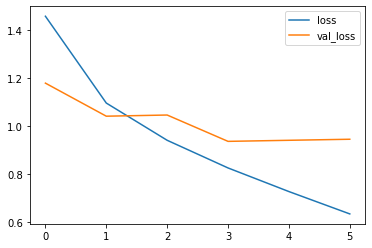

In [32]:
metrics[['loss', 'val_loss']].plot();

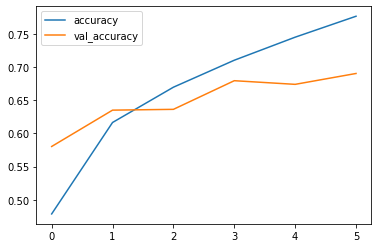

In [33]:
metrics[['accuracy', 'val_accuracy']].plot();

### Model Evaluate

In [34]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9456398487091064, 0.690500020980835]

### Classfication Report and Confusion Matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.84      0.77      0.81      1000
           2       0.55      0.65      0.59      1000
           3       0.55      0.50      0.52      1000
           4       0.66      0.56      0.61      1000
           5       0.64      0.53      0.58      1000
           6       0.71      0.82      0.76      1000
           7       0.67      0.81      0.73      1000
           8       0.90      0.68      0.78      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000




We have to compare it with random guessing. 
we have 10 classes and random chances is 10% as baseline.

So if we compare this with 10%, our model 69% is performing pretty good.

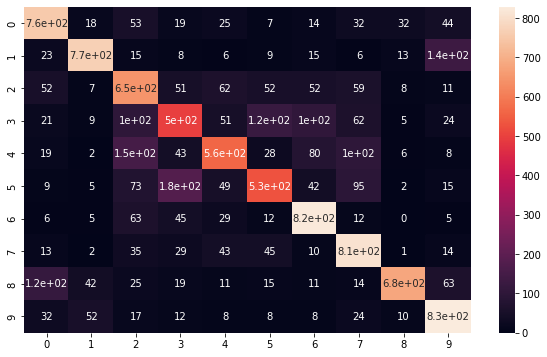

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

If we look at the heatmap, we can clearly see the model is confusing between Cat and Dog. Also between birds ans deers.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

--------

# Predicting a given image

In [39]:
single_image = x_test[0]

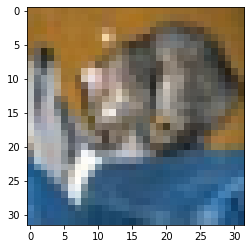

In [40]:
plt.imshow(single_image);

In [41]:
y_test[0]

array([3], dtype=uint8)

It is a cat (3)

### Make predictions

In [42]:
np.argmax(model.predict(single_image.reshape(1, 32, 32, 3)), axis=-1)# 1 image, 32x32, 3 color channels

array([3])

Looks like our model is correctly predicting.

In [43]:
single_image = x_test[16]

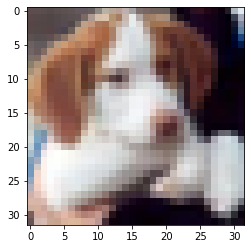

In [44]:
plt.imshow(single_image);

In [45]:
np.argmax(model.predict(single_image.reshape(1, 32, 32, 3)), axis=-1)

array([5])